### 1st Step: Define the project
#### What is the problem? Describe the problem informally and formally and list assumptions 
#### Why does the problem need to be solved? List the benefits a solution provides
#### How would I solve the problem? Describe how the problem would be solved

### 2nd Step: Data analysis

In [1]:
# To analyse the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
housing = pd.read_csv("housing.csv")
housing.shape

(20640, 10)

In [3]:
housing.head()
housing.tail()
housing[2:5]
housing["ocean_proximity"]          # Into the braket, write the range of rows or name of columns using "".
housing["ocean_proximity"].unique()
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
housing["ocean_proximity"][1]           # First column name into "" and then row
housing[housing["ocean_proximity"]=="ISLAND"]           # Filtering
housing["population"][housing["ocean_proximity"]=="ISLAND"]         
housing[["population", "households"]][housing["ocean_proximity"]=="ISLAND"]

,population,households
8314,744.0,331.0
8315,1100.0,431.0
8316,733.0,288.0
8317,341.0,160.0
8318,422.0,173.0


In [5]:
## Summarize the attributes: info(), describe()
housing.info()  # Important to find null data and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


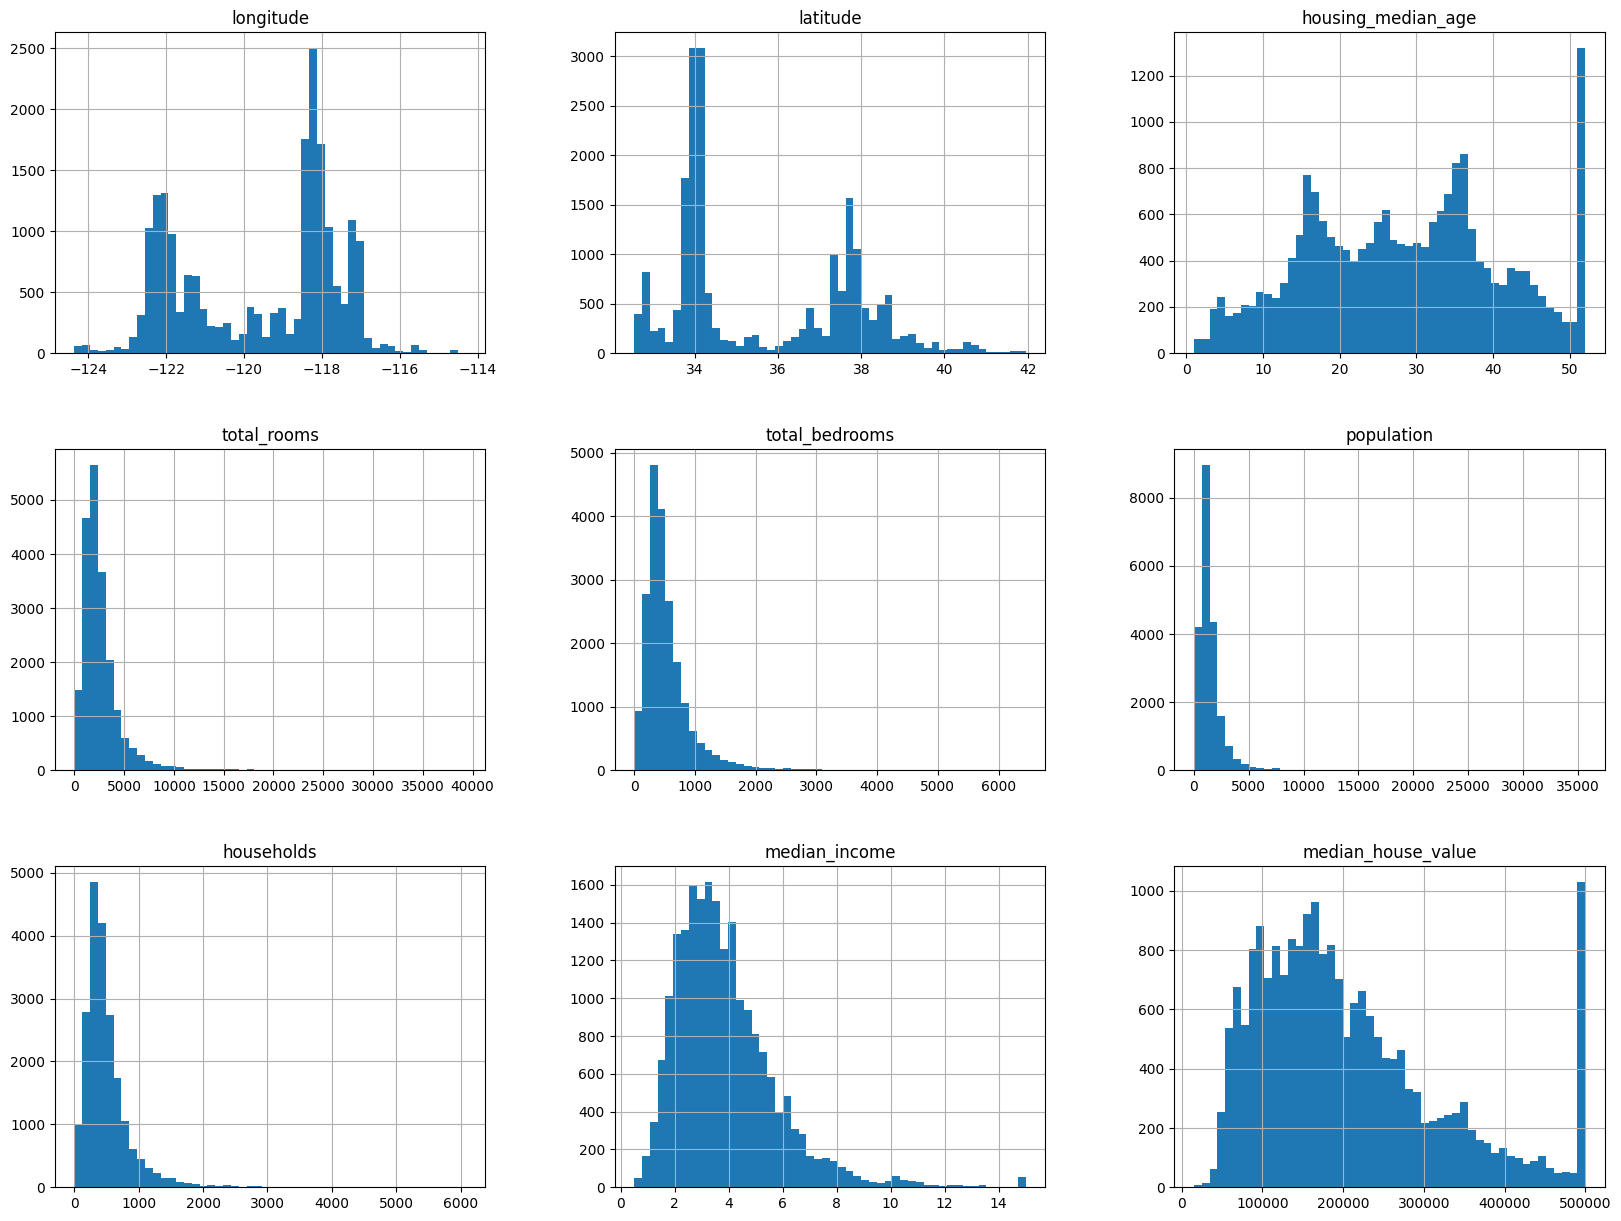

In [20]:
# Visulize data using histograms
housing.hist(figsize=(20,15), bins=50)           # Just show intiger data not strings
plt.show()
# data with wide range are better to analyze.

<Axes: xlabel='longitude', ylabel='latitude'>

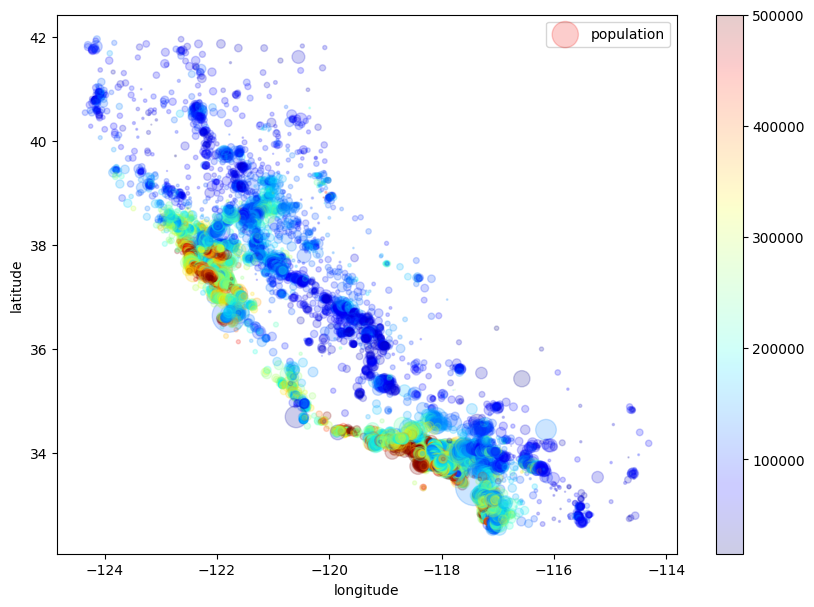

In [28]:
# Visulize data using scatter plots
housing.plot(kind="scatter", x="longitude", y="latitude", 
             s=housing["population"]/50, label="population", 
             c=housing["median_house_value"], cmap=plt.get_cmap("jet"),
             alpha=0.2, figsize=(10,7))

In [46]:
# Relationships between features or attributes
# Linear Relationships: Standard Correlation Coefficient
corr_matrix = housing.corr(numeric_only=True)            # a matrix that shows the correlation of each couple of attributes (features)
#corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=False)          # We just need the relationship bertween attributes to the target (median_house_value)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

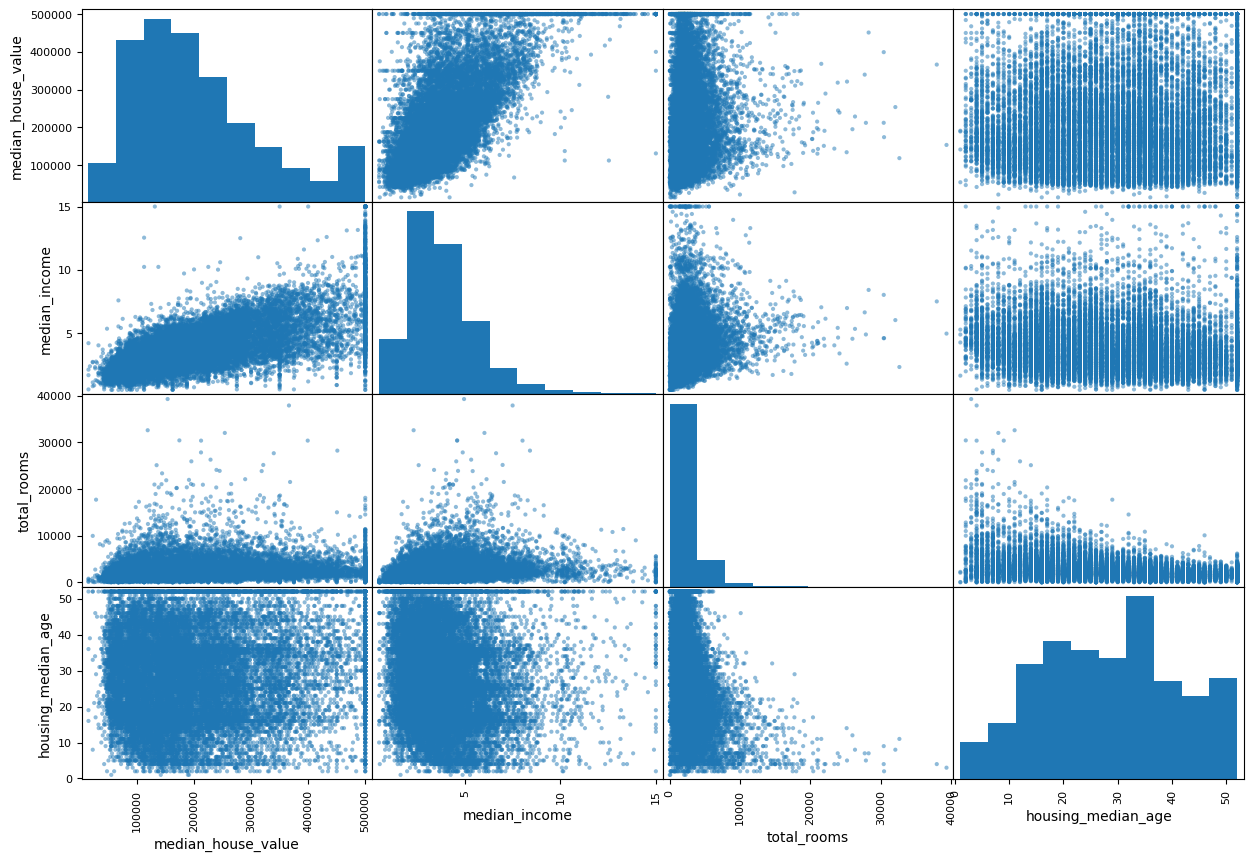

In [51]:
# Extract the important features based on the inference from the above correlation
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[features],figsize=(15,10))
plt.show()

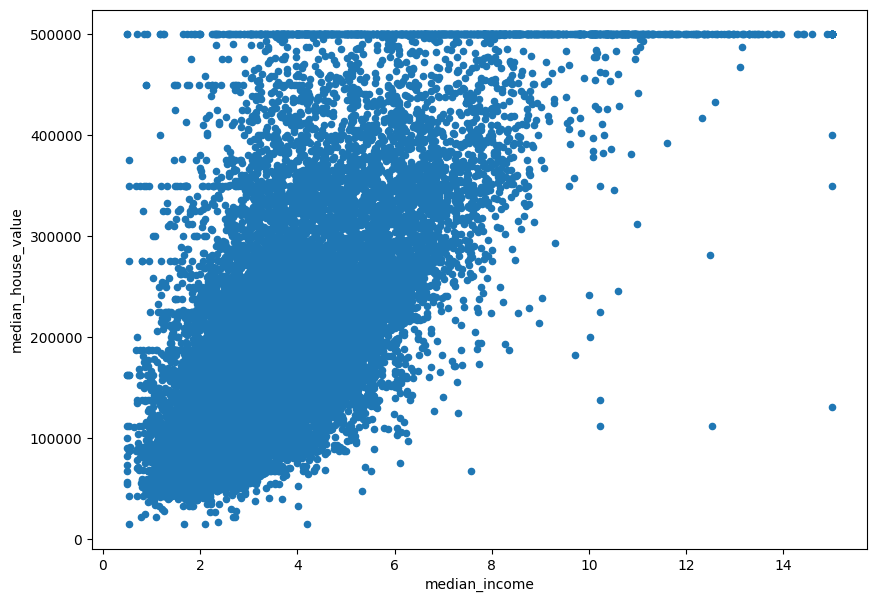

In [53]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",figsize=(10,7))

In [54]:
# Adding new attributes that may have good relationship with the target and check this out
housing["total_bedrooms_per_total_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["total_rooms_per_households"] = housing["total_rooms"] / housing["households"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_per_total_rooms,total_rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853


In [55]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value                1.000000
median_income                     0.688075
total_rooms_per_households        0.151948
total_rooms                       0.134153
housing_median_age                0.105623
households                        0.065843
total_bedrooms                    0.049686
population                       -0.024650
longitude                        -0.045967
latitude                         -0.144160
total_bedrooms_per_total_rooms   -0.255880
Name: median_house_value, dtype: float64

### 3rd Step: Data Prepration

In [4]:
## Data Selection: Consider what data is available, what data is missing and what data can be removed.
## missing values just for Numerical data, i.e. null values 
## Give info from the data to understand what columns contain null values and find text columns to drop them

# housing.info()

## Drop the target (label) column
housing_copy = housing.copy()
housing_target = housing_copy["median_house_value"].copy()
housing_attributes = housing_copy.drop("median_house_value", axis=1)
## Drop text column
housing_attributes = housing_attributes.drop("ocean_proximity", axis=1)

## Use SimpleImputer to fill the gaps
## 1. Just fill the specific columns: "total_bedrooms"
## 2. fill the gaps in all columns using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(housing_attributes)
output = imputer.transform(housing_attributes)
housing_attributes_filled = pd.DataFrame(output, columns=housing_attributes.columns)
housing_attributes_filled.info()
housing_attributes_filled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [42]:
## Data Transformation: attribute decomposition and attribute aggregation
## We found them effective to the target, based on their correlation coefficient
class AttributesAdder():
    def transform(self, X):
        rooms_per_household = X["total_rooms"] / X["households"]
        bedrooms_per_room = X["total_bedrooms"] / X["total_rooms"]
        return np.c_[X,rooms_per_household, bedrooms_per_room]

custom = AttributesAdder()
added = custom.transform(housing_attributes_filled)
columns = list(housing_attributes_filled.columns)
columns.append("rooms_per_household")
columns.append("bedrooms_per_room")
housing_new = pd.DataFrame(added, columns=columns)
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096


In [38]:
## Data Scaling: Check the large distance between min and max of the values so it is needed to be scaled
housing_new.describe()   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,5.429000,0.213794
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,2.474173,0.065248
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.037151
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,4.440716,0.175225
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,5.229129,0.203159
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.240126
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,2.824675


In [41]:
## Standardization: not limited within a range, use deviation
## Normalization: limited in [0,1], use min max so it is sensitive to outliers, useful for neural network.    

## Standarization
scaler = StandardScaler()
scaled = scaler.fit_transform(housing_new)
housing_scaled = pd.DataFrame(scaled, columns= housing_new.columns)

housing_scaled.describe()           # Check the small distance between min and max values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-8.526513e-15,-1.079584e-15,5.508083e-18,3.201573e-17,-9.363741e-17,-1.101617e-17,6.885104e-17,6.609700e-17,6.609700e-17,1.542263e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.277688e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.852319e+00,-2.707317e+00
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.718868e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-3.994496e-01,-5.911329e-01
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.428309e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-8.078489e-02,-1.629966e-01
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.537334e-01,2.644949e-01,2.758427e-01,4.593063e-01,2.519615e-01,4.035794e-01
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.408779e+01,3.025033e+01,1.460152e+01,5.858286e+00,5.516324e+01,4.001560e+01


In [68]:
## Converting categorical data to numerical ones: LabelEncoder, OneHotEncoder
## LabelEncoder: put 1,2,3,4,... instead of the words. This can convey the concept of the prioritization or preference to the algorithms, that can make a problem: e.g. small, medium, large, very large: 0,1,2,3: for this example LabelEncoder is good.
## OneHotEncoder: just use 0 and 1. Each word stands on each sepearate column.

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(housing[["ocean_proximity"]])
column = list(encoder.get_feature_names_out())
converted = pd.DataFrame(encoded, columns = column)
converted
#column

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [71]:
## Concatenate numerical data and converted categorical data
housing_final = pd.concat([housing_scaled, converted], axis=1)
housing_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-1.029988,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.888897,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-1.291686,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.449613,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,0.0,0.0,0.0,1.0,0.0


#### Build a Pipeline

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import set_config

In [34]:
### Split faetures and label(target)
housing_copy = housing.copy()
label = housing_copy["median_house_value"].copy()
features = housing_copy.drop("median_house_value", axis=1)
print(housing_copy.shape, features.shape, label.shape)

(20640, 10) (20640, 9) (20640,)


In [35]:
### Build train set and test set
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=0)
print(features_train.shape, label_train.shape, features_test.shape, label_test.shape)

(16512, 9) (16512,) (4128, 9) (4128,)


In [36]:
### Select numerical and categorical data seperately
class NumNames():
    def __init__(self, data):
        self.data = data
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        X = self.data
        data_num = X.drop("ocean_proximity", axis=1)
        num_names = list(data_num.columns)
        return num_names
        
class CatNames():
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        cat_names = ["ocean_proximity"]
        return cat_names


### Data selector
class DataSelector():
    def __init__(self, data):
        self.data = data
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        z = self.data
        return z[X].values

## AttributeAggregation
    ## index = total_rooms: 3, households: 6, total_bedrooms: 4
class AttributeAggregation():
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        bedrooms_per_room = X[:,4] / X[:,3]
        return np.c_[X,rooms_per_household, bedrooms_per_room]


In [37]:
def pipeline(data):
    num_pipeline = Pipeline([
        ("naming", NumNames(data)),
        ("selector", DataSelector(data)),
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("aggregator", AttributeAggregation()),
        ("scaler", StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ("naming", CatNames()),
        ("selector", DataSelector(data)),
        ("encoder", OneHotEncoder(sparse_output=False))
    ])


    full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

    data_prepared = full_pipeline.fit_transform(data)
    data_prepared = pd.DataFrame(data_prepared, columns=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income",
                                                        "rooms_per_household","bedrooms_per_room","1H_OCEAN","INLAND","ISLAND","NEAR_BAY","NEAR_OCEAN"])
    return data_prepared

In [ ]:
# data = features_train.copy()
""" names = num_pipeline["naming"].transform(data)

selected = num_pipeline["selector"].transform(names)

imputed = num_pipeline["imputer"].fit_transform(selected)

aggregated = num_pipeline["aggregator"].transform(imputed)

scaled = num_pipeline["scaler"].fit_transform(aggregated)

print(scaled) """

""" names = cat_pipeline["naming"].transform(data)
selected = cat_pipeline["selector"].transform(names)
print(selected)
 """

In [38]:
set_config(display="diagram")

In [39]:
num_pipeline
cat_pipeline
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('naming',
                                                 <__main__.NumNames object at 0x0000024BB6358F90>),
                                                ('selector',
                                                 <__main__.DataSelector object at 0x0000024BB6358110>),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('aggregator',
                                                 <__main__.AttributeAggregation object at 0x0000024BB63592D0>),
                                                ('scaler', StandardScaler())])),
                               ('cat_pipeline',
                                Pipeline(steps=[('naming',
                                                 <__main__.CatNames object at 0x0000024BB63542D0>),
                                                ('selector',
                                                 <__main__.DataSelector object at 0x0000024BB6359410>),
                                                ('encoder',
                                                 OneHotEncoder(sparse_output=False))]))])

### 4th Step: Models Evaluation

#### Regresion Problem: Regresion predictor models

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [114]:
train = pipeline(features_train.copy())
test = pipeline(features_test.copy())
print(train.shape, test.shape)

(16512, 15) (4128, 15)


In [72]:
## Cross_Validation
from sklearn.model_selection import cross_val_score
def model_selector(estimator):
    squred_error = cross_val_score(estimator, train, label_train, scoring="neg_mean_squared_error", cv=10)
    sqrt_error = np.sqrt(-squred_error)
    mean_error = sqrt_error.mean()
    std_error = sqrt_error.std()
    return mean_error, std_error

In [84]:
estimators = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor]
means = []
stds = []
for i in range(len(estimators)):
    estimator = estimators[i]
    mean, std = model_selector(estimator())
    means.append(mean)
    stds.append(std)

In [88]:
set = [means,stds]
set_array = np.array(set)
set_frame = pd.DataFrame(set_array, columns=["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "XGBRegressor"], index= ["mean", "std"])
set_frame

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor
mean,68669.555696,70327.484536,49904.208809,47872.353832
std,2784.143896,2808.251703,2185.126960,2136.794308


In [91]:
## Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators":[100, 500, 1000, 2000], "max_depth":[3,6,9]}]
estimator = XGBRegressor()
grid_search = GridSearchCV(estimator= estimator, param_grid= param_grid, scoring= "neg_mean_squared_error", cv= 5)
grid_search.fit(train, label_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'max_depth': [3, 6, 9],
                          'n_estimators': [100, 500, 1000, 2000]}],
             scoring='neg_mean_squared_error')

In [97]:
## Select the best algorithm
print("best_parametere =", grid_search.best_params_)
print("best_estimator =", grid_search.best_estimator_)

best_parametere = {'max_depth': 3, 'n_estimators': 1000}
best_estimator = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [95]:
## Test the model on test set
best_estimator = grid_search.best_estimator_
prediction = best_estimator.predict(test)
mse = mean_squared_error(label_test, prediction)
sqrt = np.sqrt(mse)
print(sqrt)

score = best_estimator.score(test, label_test)
print(score)

53690.10618554277
0.7789319632835748


In [109]:
final_estimator = XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.1)
final_estimator.fit(train,label_train)
prediction = final_estimator.predict(test)
mse = mean_squared_error(label_test, prediction)
sqrt = np.sqrt(mse)
print(sqrt)

score = final_estimator.score(test, label_test)
print(score)

52616.3914825548
0.7876855520286125
